# PyGrunn - Intro to `Vaex`

In [1]:
import vaex

import pylab as p
import numpy as np

## Concepts being `vaex`
 - memory mappable storage
 - expression system
 - delayed (a.k.a _lazy_) evaluations
 - efficient algorithms
 - emphasis on aggregate data properties instead of individual samples

### Examine the contents: NYC _yellowcabs_ dataset (all data between 2009-2015)
https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

### Read in the data

In [2]:
# Check file size on disk
!du -h ./data/yellow_taxi_2009_2015_f32.hdf5

107G	./data/yellow_taxi_2009_2015_f32.hdf5


In [3]:
# Opens the data in hdf5 format
df = vaex.open('./data/yellow_taxi_2009_2015_f32.hdf5')

In [4]:
# Basic view of the contents
df

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.630000114440918,-73.99195861816406,40.72156524658203,nan,nan,-73.99380493164062,40.6959228515625,8.899999618530273,0.5,nan,0.0,0.0,9.399999618530273
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.550000190734863,-73.98210144042969,40.736289978027344,nan,nan,-73.95584869384766,40.768028259277344,12.100000381469727,0.5,nan,2.0,0.0,14.600000381469727
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.350000381469727,-74.0025863647461,40.73974609375,nan,nan,-73.86997985839844,40.770225524902344,23.700000762939453,0.0,nan,4.739999771118164,0.0,28.440000534057617
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5.0,-73.9742660522461,40.79095458984375,nan,nan,-73.9965591430664,40.731849670410156,14.899999618530273,0.5,nan,3.049999952316284,0.0,18.450000762939453
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4000000059604645,-74.00157928466797,40.719383239746094,nan,nan,-74.00837707519531,40.7203483581543,3.700000047683716,0.0,nan,0.0,0.0,3.700000047683716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,173,057,922",VTS,2015-12-31 23:59:56.000000000,2016-01-01 00:08:18.000000000,5,1,1.2000000476837158,-73.99381256103516,40.72087097167969,1.0,0.0,-73.98621368408203,40.722469329833984,7.5,0.5,0.5,1.7599999904632568,0.0,10.5600004196167
"1,173,057,923",CMT,2015-12-31 23:59:58.000000000,2016-01-01 00:05:19.000000000,2,2,2.0,-73.96527099609375,40.76028060913086,1.0,0.0,-73.93951416015625,40.75238800048828,7.5,0.5,0.5,0.0,0.0,8.800000190734863
"1,173,057,924",CMT,2015-12-31 23:59:59.000000000,2016-01-01 00:12:55.000000000,2,2,3.799999952316284,-73.98729705810547,40.739078521728516,1.0,0.0,-73.9886703491211,40.69329833984375,13.5,0.5,0.5,0.0,0.0,14.800000190734863
"1,173,057,925",VTS,2015-12-31 23:59:59.000000000,2016-01-01 00:10:26.000000000,1,2,1.9600000381469727,-73.99755859375,40.72569274902344,1.0,0.0,-74.01712036132812,40.705322265625,8.5,0.5,0.5,0.0,0.0,9.800000190734863


In [5]:
# A more detailed info on the contents of the DataFrame
df.info()

column,type,unit,description,expression
vendor_id,str,,,
pickup_datetime,datetime64[ns],,,
dropoff_datetime,datetime64[ns],,,
passenger_count,int64,,,
payment_type,str,,,
trip_distance,float32,,,
pickup_longitude,float32,,,
pickup_latitude,float32,,,
rate_code,float32,,,
store_and_fwd_flag,float32,,,


### Interaction with the data: standard dataframe API
- uses expressions instead of in-memory arrays;
- lazy evaluations: the computations are performed only when the output is performed;
- printing results in a preview: only the head/tail rows are computed and shown;
- out-of-core: all standard computations can be done independently of the memory avaialbe on your machine;

In [6]:
# Let's view some columns

# For instance the trip_distance
df.trip_distance

Expression = trip_distance
Length: 1,173,057,927 dtype: float32 (column)
---------------------------------------------
         0   2.63
         1   4.55
         2  10.35
         3      5
         4    0.4
       ...       
1173057922    1.2
1173057923      2
1173057924    3.8
1173057925   1.96
1173057926   1.06

In [7]:
# Then pickup time
df.pickup_datetime

Expression = pickup_datetime
Length: 1,173,057,927 dtype: datetime64[ns] (column)
----------------------------------------------------
         0  2009-01-04 02:52:00.000000000
         1  2009-01-04 03:31:00.000000000
         2  2009-01-03 15:43:00.000000000
         3  2009-01-01 20:52:58.000000000
         4  2009-01-24 16:18:23.000000000
                   ...                   
1173057922  2015-12-31 23:59:56.000000000
1173057923  2015-12-31 23:59:58.000000000
1173057924  2015-12-31 23:59:59.000000000
1173057925  2015-12-31 23:59:59.000000000
1173057926  2015-12-31 23:59:59.000000000

In [8]:
# For any computation, if printed/displayed, only a preview is shown
np.log10(df.trip_distance) + np.sqrt(df.total_amount)

Expression = (log10(trip_distance) + sqrt(total_amount))
Length: 1,173,057,927 dtype: float32 (expression)
-------------------------------------------------
         0   3.4859
         1  4.47901
         2  6.34786
         3  4.99432
         4   1.5256
        ...        
1173057922   3.3288
1173057923  3.26751
1173057924  4.42686
1173057925  3.42275
1173057926  4.23957

### Expressions & Virtual Columns

![image](meme-expressions.png)

In [9]:
# Expression example
df.total_amount / df.trip_distance

Expression = (total_amount / trip_distance)
Length: 1,173,057,927 dtype: float32 (expression)
-------------------------------------------------
         0  3.57414
         1  3.20879
         2  2.74783
         3     3.69
         4     9.25
        ...        
1173057922      8.8
1173057923      4.4
1173057924  3.89474
1173057925        5
1173057926  16.7547

In [10]:
# Define a virtual column - it uses virtually no memory!
df['fee_over_distance'] = df.total_amount / df.trip_distance

# Display the DataFrame
df.head(5)

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,fee_over_distance
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4,3.57414
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6,3.20879
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.35,-74.0026,40.7397,nan,nan,-73.87,40.7702,23.7,0,nan,4.74,0,28.44,2.74783
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7318,14.9,0.5,nan,3.05,0,18.45,3.69
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7203,3.7,0,nan,0,0,3.7,9.25


### Selections and filtering  – It is good to be _lazy!_ 

In [11]:
# Calculate statistics
df.mean(df.trip_distance)

array(4.05150297)

In [12]:
# Calculate statistics
df.mean(df.fee_over_distance)

<string>:1: RuntimeWarning: divide by zero encountered in true_divide
<string>:1: RuntimeWarning: invalid value encountered in true_divide


array(nan)

In [13]:
# Select only positive, non zero distances
df[df.trip_distance>0].mean(df.fee_over_distance)

array(3.40151652)

In [14]:
# Named selections, multiple computations in a single pass over the data
df.select(df.trip_distance>5, name='td5')
df.select(df.trip_distance>10, name='td10')

df.mean(df.fee_over_distance, selection=['td5', 'td10'])

array([3.83839378, 3.28861097])

## (Binned) Statistics

### 0-dimensional

In [15]:
# the number of rows in the trip_distance expression
df.count(df.trip_distance)

array(1173057927)

### 1-dimensional

In [16]:
# count the number of rows per pickup_latitude
df.count(binby=df.pickup_latitude, limits=[40.5, 41], shape=16)

array([    23436,     37055,    140003,    364258,  18673251,   8492798,
        70176504, 404278026, 545245606,  95674209,   5403892,    860256,
          162772,     67552,     36000,     24252])

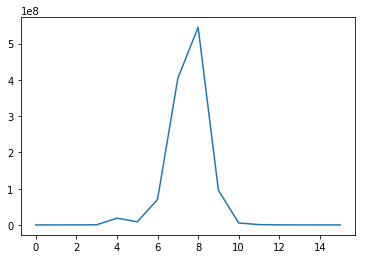

In [17]:
p.plot(_)
p.show()

### 2-dimensional

In [18]:
counts2d = df.count(binby=[df.pickup_longitude, df.pickup_latitude], shape=128, limits='95%')
counts2d.shape

(128, 128)

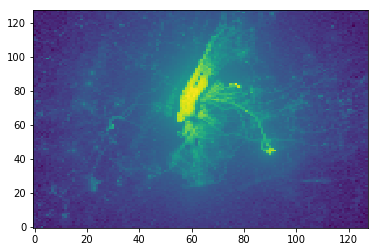

In [19]:
p.imshow(np.log1p(counts2d).T, origin='lower', aspect='auto')
p.show()

### Plotting
 - conveniently wrapping the statistic method of `vaex` with `matplotlib`


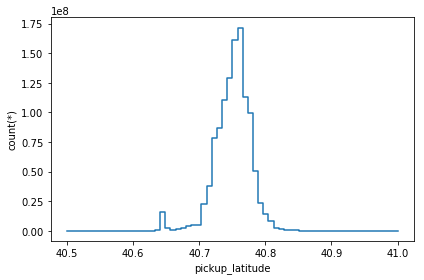

In [20]:
df.plot1d(df.pickup_latitude, limits=[40.5, 41], shape=64)
p.show()

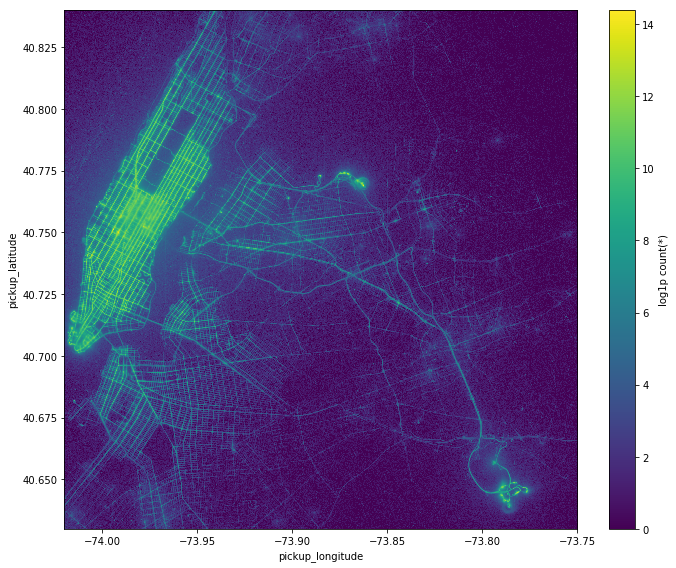

In [21]:
# Centre on Manhatten
limits = [[-74.02, -73.75], [40.63, 40.84]]

df.plot(x=df.pickup_longitude, y=df.pickup_latitude, 
        f='log1p', limits=limits, shape=1024,
        figsize=(10, 8), colormap='viridis')
p.show()

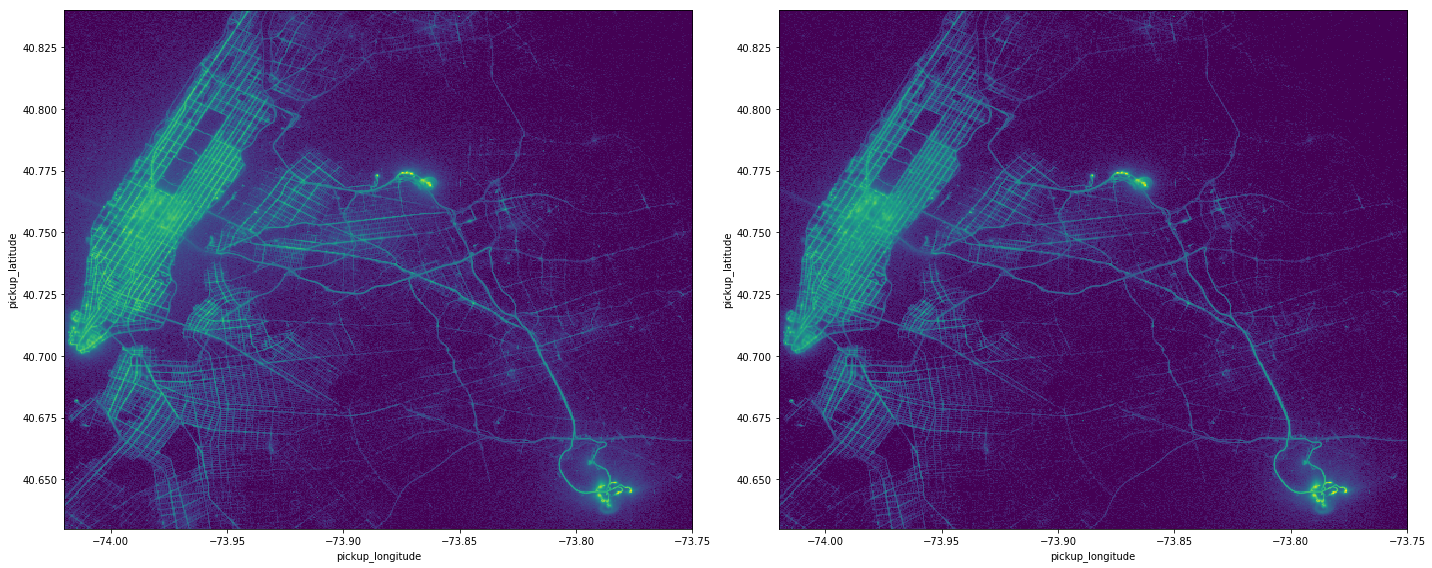

In [22]:
# Supports selections
p.figure(figsize=(20, 8))
gs = p.GridSpec(nrows=1, ncols=2)

p.subplot(gs[0])
df.plot(x=df.pickup_longitude, y=df.pickup_latitude, 
        f='log1p', limits=limits, shape=512,
        colorbar=False, colormap='viridis',
        selection='td5')


p.subplot(gs[1])
df.plot(x=df.pickup_longitude, y=df.pickup_latitude, 
        f='log1p', limits=limits, shape=512,
        colorbar=False, colormap='viridis',
        selection='td10')


p.tight_layout()
p.show()

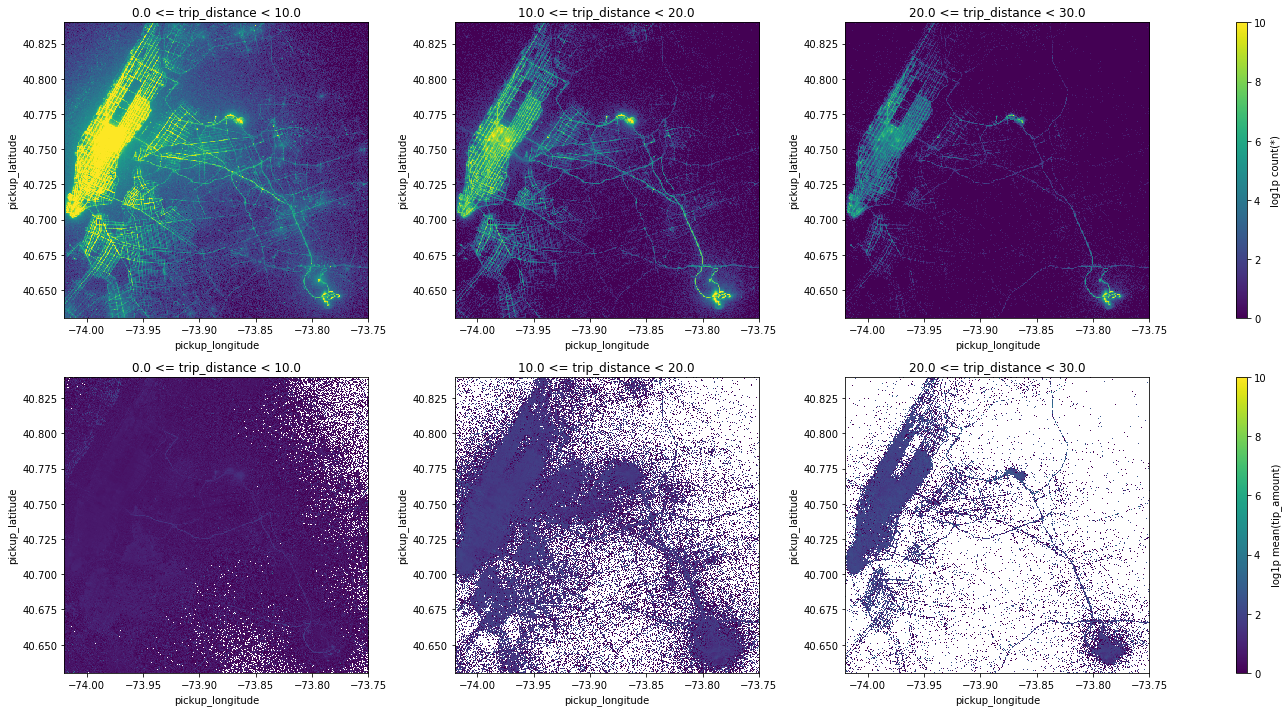

In [23]:
df.plot(df.pickup_longitude, df.pickup_latitude,
        z='trip_distance:0,30,3',
        what=[vaex.stat.count(), vaex.stat.mean(df.tip_amount)],
        visual=dict(column="z", row='what'),
        f="log1p", vmin=0, vmax=10,
        limits=limits, figsize=(18,10), shape=512, colormap="viridis")

p.show()

### Heavy calculations

In [24]:
# in Kilometers
def arc_distance(theta_1, phi_1, theta_2, phi_2):
    temp = (np.sin((theta_2-theta_1)/2*np.pi/180)**2
           + np.cos(theta_1*np.pi/180)*np.cos(theta_2*np.pi/180) * np.sin((phi_2-phi_1)/2*np.pi/180)**2)
    distance = 2 * np.arctan2(np.sqrt(temp), np.sqrt(1-temp))
    return distance * 6400

In [25]:
# distance Groningen - Utrecht [km]
arc_distance(53.1739086, 6.5990374, 52.0842715, 5.0124523)

162.42790436215137

In [26]:
# Add the expression to the DataFrame
arc_distance_expression = arc_distance(df.pickup_longitude, df.pickup_latitude, df.dropoff_longitude, df.dropoff_latitude)
df['arc_distance'] = arc_distance_expression

In [27]:
# View the dataset
df.head(5)

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,fee_over_distance,arc_distance
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4,3.57414,0.816326
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6,3.20879,3.09157
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.35,-74.0026,40.7397,nan,nan,-73.87,40.7702,23.7,0,nan,4.74,0,28.44,2.74783,14.8422
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7318,14.9,0.5,nan,3.05,0,18.45,3.69,3.08519
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7203,3.7,0,nan,0,0,3.7,9.25,0.759901


In [28]:
%%time
# The the sum of the "expensive" arc_distance column
df.sum(df.arc_distance)

CPU times: user 3min 12s, sys: 26.9 s, total: 3min 39s
Wall time: 26.1 s


array(2.1745867e+10, dtype=float32)

In [29]:
%%time
# Now pre-compile the expression with numba and compute the sum of the "expensive" arc_distance column
df.sum(df.arc_distance.jit_numba())

CPU times: user 2min 23s, sys: 644 ms, total: 2min 23s
Wall time: 13.1 s


array(2.40979696e+10)

### End of part 1